Importing libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

import warnings as wr
wr.filterwarnings('ignore')


Load the dataset

In [2]:
df = pd.read_csv('/content/mall customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:

df.rename(columns={'Gender': 'gender','Age': 'age', 'Annual Income (k$)':'income', 'Spending Score (1-100)':'score'}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   gender      200 non-null    object
 2   age         200 non-null    int64 
 3   income      200 non-null    int64 
 4   score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.shape

(200, 5)

In [8]:
df.isnull().sum()

CustomerID    0
gender        0
age           0
income        0
score         0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
le =LabelEncoder()
df['gender']=le.fit_transform(df['gender'])


Visualization

<Figure size 600x600 with 0 Axes>

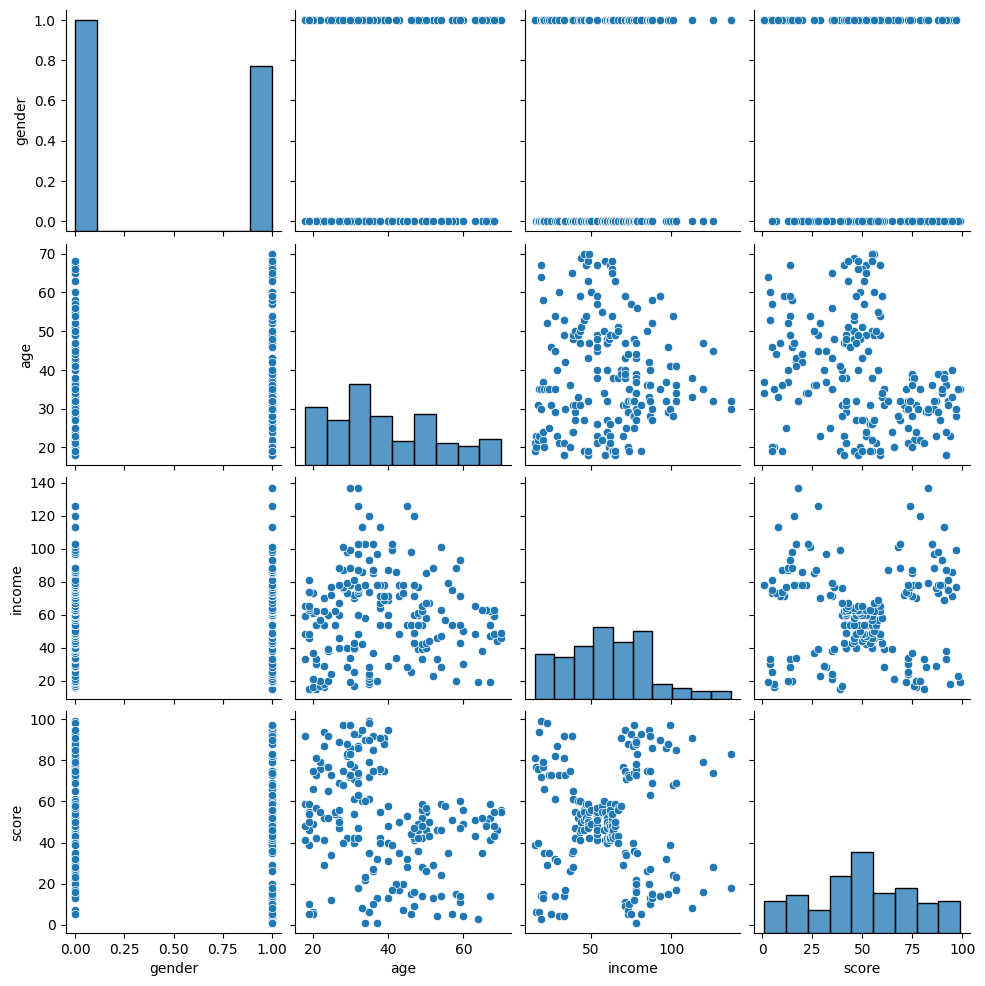

In [11]:
fig = plt.figure(figsize=(6, 6))
sns.pairplot(df[['gender','age','income','score']])

Now working with two coloms for Clustering

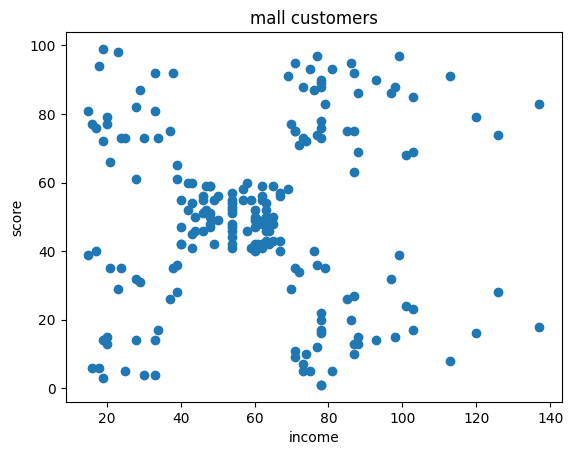

In [12]:
plt.scatter(df['income'],df['score'])

plt.xlabel('income')
plt.ylabel('score')
plt.title('mall customers')
plt.show()


Optimiazing KMeans

In [13]:
wcss = []
cluster = range(1,11)
for k in cluster:
  chappie = KMeans(n_clusters=k)
  chappie.fit(df[['income','score']])
  wcss.append(chappie.inertia_)
print(wcss)

[269981.28, 183069.17582751298, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37233.814510710006, 30241.34361793658, 25095.70320999756, 21850.165282585636, 19701.35225128175]


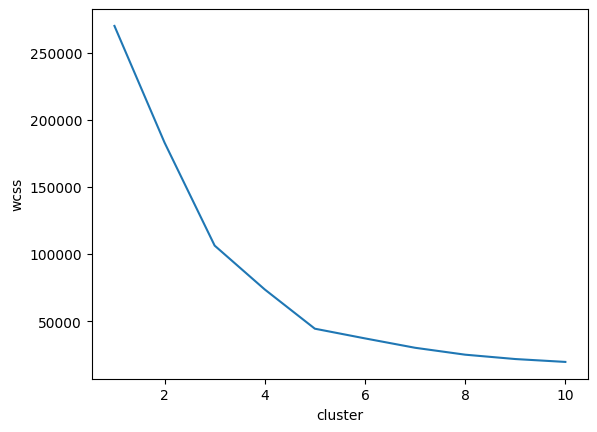

In [14]:
plt.plot(cluster,wcss)

plt.xlabel('cluster')
plt.ylabel('wcss')
plt.show()




In [15]:
!pip install kneed

In [16]:
from kneed import KneeLocator

In [17]:
kn = KneeLocator(cluster,wcss,direction = 'decreasing',curve='convex')

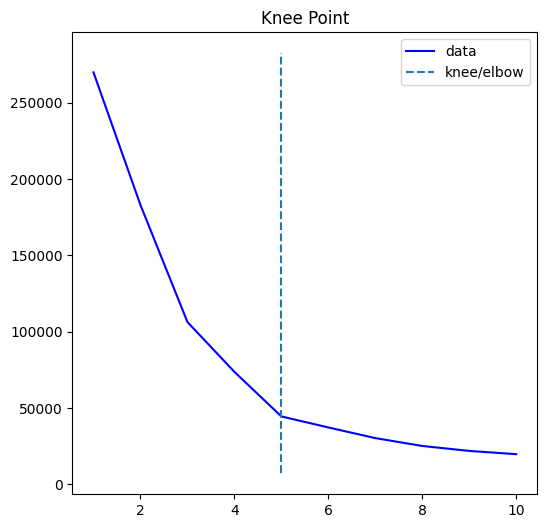

In [18]:
kn.plot_knee()

In [19]:
kn.knee

5

After Optimizing KMeans Clustering

In [20]:
chappie = KMeans(n_clusters=5)


In [21]:
chappie.fit(df[['income','score']])

KMeans(n_clusters=5)

In [22]:
df['cluster']=chappie.predict(df[['income','score']])

In [23]:
df.head()

,CustomerID,gender,age,income,score,cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,1
2,3,0,20,16,6,3
3,4,0,23,16,77,1
4,5,0,31,17,40,3


In [24]:
df0 = df[df['cluster']==0]
df1 = df[df['cluster']==1]
df2 = df[df['cluster']==2]
df3 = df[df['cluster']==3]
df4 = df[df['cluster']==4]




In [25]:
centers = chappie.cluster_centers_
centers

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

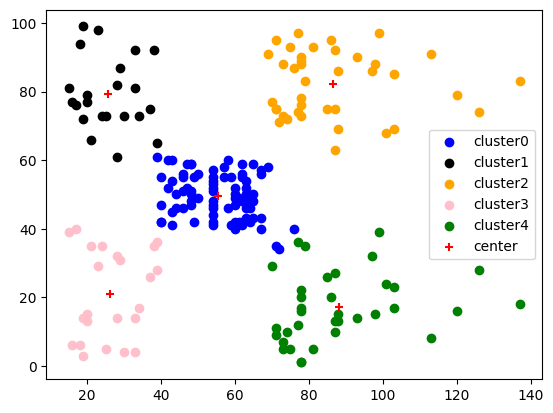

In [39]:
plt.scatter(df0['income'],df0['score'],color='blue',label = 'cluster0')
plt.scatter(df1['income'],df1['score'],color='black',label = 'cluster1')
plt.scatter(df2['income'],df2['score'],color='orange',label = 'cluster2')
plt.scatter(df3['income'],df3['score'],color='pink',label = 'cluster3')
plt.scatter(df4['income'],df4['score'],color='green',label = 'cluster4')




plt.scatter(centers[:,0],centers[:,1],color = 'red',label='center',marker='+')
plt.legend()

In [27]:
df.head()

,CustomerID,gender,age,income,score,cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,1
2,3,0,20,16,6,3
3,4,0,23,16,77,1
4,5,0,31,17,40,3


Now data is ready for classification

In [28]:
x = df.drop(['cluster','CustomerID'],axis=1)
y = df['cluster']

In [29]:
x.head()

,gender,age,income,score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [30]:
y.head()

0    3
1    1
2    3
3    1
4    3
Name: cluster, dtype: int32

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [51]:
x.shape,x_train.shape,x_test.shape

((200, 4), (160, 4), (40, 4))

In [52]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test =  sc.fit_transform(x_test)

In [58]:
chappie = GradientBoostingClassifier(n_estimators=5,random_state=2)

In [59]:
chappie.fit(x_train,y_train)
pred_cluster = chappie.predict(x_test)
accuracy = accuracy_score(y_test,pred_cluster)
accuracy

0.95

In [62]:
prediction = pd.DataFrame({'cluster' : y_test,'predicted_cluster' : pred_cluster})
prediction.shape

(40, 2)

In [63]:
print(prediction)

     cluster  predicted_cluster
95         0                  0
15         1                  1
30         3                  3
158        4                  4
128        4                  4
115        0                  0
69         0                  0
170        4                  4
174        4                  4
45         1                  1
66         0                  0
182        4                  4
165        2                  2
78         0                  0
186        4                  4
177        2                  2
56         0                  0
152        4                  4
82         0                  0
68         0                  0
124        4                  4
16         3                  3
148        4                  4
93         0                  0
65         0                  0
60         0                  0
84         0                  0
67         0                  0
125        2                  2
132        0                  0
9       

Building a prediction system for evaluating

In [68]:
#input = (1	,19	,15	,39	)

#input = np.asarray(input)
#input = input.reshape(1,-1)

#predicted_cluster = chappie.predict(input)
#print(predicted_cluster)

[2]
